In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import csv file
Prod= pd.read_csv("/content/drive/MyDrive/Data analytics and reporting(DAR)/Flipkart Product Dataset.csv")

In [2]:
#View dimensions of data sets
print(Prod.shape)

(12041, 11)


In [3]:
#Head of the data set
Prod.head()

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...


In [4]:
#View summary of data
print(Prod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
dtypes: float64(2), object(9)
memory usage: 1.0+ MB
None


In [5]:
#
print(Prod.describe())

       product_rating  seller_rating
count    11961.000000   11827.000000
mean         4.061617       4.394538
std          0.345575       0.404288
min          1.000000       3.000000
25%          3.900000       4.100000
50%          4.100000       4.400000
75%          4.300000       4.700000
max          5.000000       5.000000


In [6]:
#Check missing values
print(Prod.isnull().sum())

category_1           0
category_2           0
category_3           0
title               18
product_rating      80
selling_price       28
mrp                375
seller_name        216
seller_rating      214
description       7020
highlights        5481
dtype: int64


In [7]:
#Mean
Mean=Prod['product_rating'].mean()
print(Mean)

4.061616921662068


In [8]:
#Median
Median=Prod['product_rating'].median()
print(Median)

4.1


In [9]:
#Mode
Mode=Prod['product_rating'].mode()
print(Mode)

0    4.0
Name: product_rating, dtype: float64


In [10]:
#Drop row with missing values and check the first few rows
Prod_dropped=Prod.dropna()
print(Prod_dropped.head())

                category_1 category_2 category_3  \
1   Sports, Books and More     Sports   Cricket    
4   Sports, Books and More     Sports   Cricket    
7   Sports, Books and More     Sports   Cricket    
8   Sports, Books and More     Sports   Cricket    
10  Sports, Books and More     Sports   Cricket    

                                                title  product_rating  \
1   ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...             4.4   
4   CEAT Hitman Full Size Double Blade Poplar Cric...             3.4   
7   VECTOR X Cricket Bat Grip Handle Chevron Extra...             4.1   
8   LYCAN Full Size Pvc/ Hard Plastic Cricket Bat ...             4.0   
10  Star X Thrill Fox Heavy Duty First Grade HD Pl...             4.0   

   selling_price     mrp          seller_name  seller_rating  \
1           ₹152    ₹600           I2SERVICES            4.4   
4           ₹329  ₹1,399             IndiaFit            4.7   
7           ₹369    ₹396  SOCCERINTERNATIONAL           

In [11]:
#Display column names of the data set
Prod.columns

Index(['category_1', 'category_2', 'category_3', 'title', 'product_rating',
       'selling_price', 'mrp', 'seller_name', 'seller_rating', 'description',
       'highlights'],
      dtype='object')

In [12]:
#Fill missing values in 'product_rating' with the mean of the column
Prod['product_rating'] = Prod['product_rating'].fillna(Mean)
## Check how many missing values remain in each column
Prod.isnull().sum()

,0
category_1,0
category_2,0
category_3,0
title,18
product_rating,0
selling_price,28
mrp,375
seller_name,216
seller_rating,214
description,7020


In [13]:
#Remove ₹ and commas, convert to numeric
Prod['selling_price'] = Prod['selling_price'].replace('[₹,]', '', regex=True).astype(float)
Prod['mrp'] = Prod['mrp'].replace('[₹,]', '', regex=True).astype(float)
# Display first few rows
print(Prod[['selling_price', 'mrp']].head())

   selling_price     mrp
0         1615.0  4000.0
1          152.0   600.0
2           59.0   199.0
3           75.0   299.0
4          329.0  1399.0


In [14]:
#Forward fill missing values
New_prod=Prod.fillna(method='ffill')
#Print the first 5 rows
print(New_prod.head())

               category_1 category_2 category_3  \
0  Sports, Books and More     Sports   Cricket    
1  Sports, Books and More     Sports   Cricket    
2  Sports, Books and More     Sports   Cricket    
3  Sports, Books and More     Sports   Cricket    
4  Sports, Books and More     Sports   Cricket    

                                               title  product_rating  \
0  ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...             4.4   
1  ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...             4.4   
2  VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...             3.7   
3  VICTORY Cricket Wind Ball (Pack of 1) - Made i...             3.8   
4  CEAT Hitman Full Size Double Blade Poplar Cric...             3.4   

   selling_price     mrp     seller_name  seller_rating  \
0         1615.0  4000.0      I2SERVICES            4.4   
1          152.0   600.0      I2SERVICES            4.4   
2           59.0   199.0  VictoryOutlets            4.7   
3           75.0   299.0

/tmp/ipython-input-1304556385.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  New_prod=Prod.fillna(method='ffill')


In [15]:
#Backward fill missing values
New_prod=Prod.fillna(method='bfill')
##Print the first 5 rows
print(New_prod.head())

               category_1 category_2 category_3  \
0  Sports, Books and More     Sports   Cricket    
1  Sports, Books and More     Sports   Cricket    
2  Sports, Books and More     Sports   Cricket    
3  Sports, Books and More     Sports   Cricket    
4  Sports, Books and More     Sports   Cricket    

                                               title  product_rating  \
0  ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...             4.4   
1  ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...             4.4   
2  VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...             3.7   
3  VICTORY Cricket Wind Ball (Pack of 1) - Made i...             3.8   
4  CEAT Hitman Full Size Double Blade Poplar Cric...             3.4   

   selling_price     mrp     seller_name  seller_rating  \
0         1615.0  4000.0      I2SERVICES            4.4   
1          152.0   600.0      I2SERVICES            4.4   
2           59.0   199.0  VictoryOutlets            4.7   
3           75.0   299.0

/tmp/ipython-input-3987773387.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  New_prod=Prod.fillna(method='bfill')


In [16]:
#Filtering data
filtered_product_rating= Prod['product_rating'] >= 4
filtered_product_rating

,product_rating
0,True
1,True
2,False
3,False
4,False
...,...
12036,False
12037,True
12038,True
12039,True


In [17]:
#Filter by category
filtered_cricket_items = Prod['category_3'].str.contains("Cricket", na=False)
filtered_cricket_items

,category_3
0,True
1,True
2,True
3,True
4,True
...,...
12036,False
12037,False
12038,False
12039,False


In [18]:
#Sort by price descending
sorted_Prod = Prod.sort_values(by='selling_price', ascending=False)
sorted_Prod

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
2328,Electronics,Laptops,Gaming Laptops,DELL Allienware Core i7 12th Gen - (32 GB/1 TB...,4.800000,300490.0,1174131.0,PETILANTE Online,4.8,NaN,"17.3 Inch Full HD, Comfortview Plus NVIDIA G-S..."
2683,Electronics,Camera Accessories,Lens,"SONY SEL100400GMC Lens (White, 100 - 400 mm)",4.800000,199690.0,229490.0,RetailNet,4.8,NaN,"Lens Mount: E-mount Designed For: ILCE-7M2K, I..."
2337,Electronics,Desktop PCs,Desktop PCs,APPLE iMac Core i5 (7th Gen) (8 GB DDR4/1 TB/M...,4.400000,189990.0,190400.0,OmniTechRetail,4.4,NaN,Mac OS X Sierra Intel Core i5 (7th Gen) HDD Ca...
2334,Electronics,Desktop PCs,Desktop PCs,APPLE All-in-One Core i5 (6th Gen) (8 GB DDR3/...,4.400000,180990.0,188900.0,OmniTechRetail,4.4,NaN,Mac OS X Lion Intel Core i5 (6th Gen) HDD Capa...
2703,Electronics,Camera Accessories,Lens,"SONY SEL200600G Lens (White, 200 - 600 mm)",4.700000,154890.0,177990.0,RetailNet,4.8,NaN,"Lens Mount: E-mount Designed For: ILCE-7M2K, I..."
...,...,...,...,...,...,...,...,...,...,...,...
9967,Home and Furniture,"Kitchen ,Cookware and Serveware",Tawas,NIRLON Casting Coated Nonstick Aluminium Uttap...,5.000000,NaN,NaN,NaN,NaN,Nirlon Uttapam / Snack maker is a useful addit...,"Made of: Aluminium Type: Tawa Non-stick, Dishw..."
10379,Home and Furniture,Kitchen Storage,Casseroles,NaN,4.061617,NaN,NaN,NaN,NaN,NaN,NaN
11548,Home and Furniture,Home Décor,Clocks,BAREPEPE Digital Black Clock,4.061617,NaN,NaN,NaN,NaN,NaN,Alarm Height x Width 100 mm x 160 mm Digital
11817,Home and Furniture,Home Lighting,Ceiling Lamp,NaN,4.061617,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Sort by price ascending
sorted_Prod = Prod.sort_values(by='selling_price')
sorted_Prod

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
656,"Sports, Books and More",Food Essentials,snacks and beverages,BRITANNIA Gold Marie Biscuit (68 g),4.400000,10.0,NaN,SuperComNet,4.6,NaN,Type: Marie Biscuit Quantity: 68 g Base Flavor...
1264,"Sports, Books and More",Auto Accessories,Helmets and Riding Gears,Pidilite Motomax Car & Bike 2K Rubbing Compoun...,3.600000,51.0,65.0,BTPLD,4.4,"Removes minor bike and car scratches, paint de...",Pack Type: Bottle Pack of 1 Form: Wax Quantity...
1304,"Sports, Books and More",Auto Accessories,Car Audio /Video,Pidilite Motomax Car & Bike 2K Rubbing Compoun...,3.600000,51.0,65.0,BTPLD,4.4,"Removes minor bike and car scratches, paint de...",Pack Type: Bottle Pack of 1 Form: Wax Quantity...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.700000,59.0,199.0,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
10055,Home and Furniture,"Kitchen ,Cookware and Serveware",Kitchen tools,KVG Whisk Beater Steel Coil Whisk,3.600000,59.0,75.0,MYTHANGLORYRetail,4.9,KVG Stainless Steel Egg Beater Lassi / Butter ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9967,Home and Furniture,"Kitchen ,Cookware and Serveware",Tawas,NIRLON Casting Coated Nonstick Aluminium Uttap...,5.000000,NaN,NaN,NaN,NaN,Nirlon Uttapam / Snack maker is a useful addit...,"Made of: Aluminium Type: Tawa Non-stick, Dishw..."
10379,Home and Furniture,Kitchen Storage,Casseroles,NaN,4.061617,NaN,NaN,NaN,NaN,NaN,NaN
11548,Home and Furniture,Home Décor,Clocks,BAREPEPE Digital Black Clock,4.061617,NaN,NaN,NaN,NaN,NaN,Alarm Height x Width 100 mm x 160 mm Digital
11817,Home and Furniture,Home Lighting,Ceiling Lamp,NaN,4.061617,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Group by
#Mean
mean_stats = Prod.groupby('category_1')[['selling_price', 'mrp', 'product_rating']].mean()
print(mean_stats)

                        selling_price           mrp  product_rating
category_1                                                         
Bady and Kids              507.073599   1232.446476        4.082332
Electronics               7246.622313  10499.896767        4.125469
Home and Furniture        2278.016076   4436.169516        4.042148
Men's wear                 899.822354   2122.377778        4.017302
Sports, Books and More    1536.490369   3159.177281        4.077219
Women's wear              1199.926263   1914.987075        4.064255


In [21]:
#Group by
#Median
median_stats = Prod.groupby('category_1')[['selling_price', 'mrp', 'product_rating']].median()
print(median_stats)

                        selling_price     mrp  product_rating
category_1                                                   
Bady and Kids                   359.0   999.0             4.1
Electronics                     799.0  1950.0             4.2
Home and Furniture              529.0  1299.0             4.1
Men's wear                      498.0  1499.0             4.0
Sports, Books and More          399.0   899.0             4.1
Women's wear                    399.0  1299.0             4.1


In [22]:
#Group by
#Standard deviation
std_stats = Prod.groupby('category_1')[['selling_price', 'mrp', 'product_rating']].std()
print(std_stats)

                        selling_price           mrp  product_rating
category_1                                                         
Bady and Kids             1154.353676   1479.543958        0.329574
Electronics              22811.164889  45089.746323        0.382444
Home and Furniture        5153.493842   8871.914503        0.350573
Men's wear                1331.089363   2510.037129        0.302392
Sports, Books and More    5501.466016  10773.566055        0.416056
Women's wear              5226.618267   3275.015396        0.307685


In [23]:
#Pivot table — Average Selling Price by Category
pivot_price = pd.pivot_table(Prod, values='selling_price',index='category_1',columns='category_2',aggfunc='mean')
print(pivot_price)

category_2              Accessories  Auto Accessories  Baby Boy Clothing  \
category_1                                                                 
Bady and Kids                   NaN               NaN            372.975   
Electronics                     NaN               NaN                NaN   
Home and Furniture              NaN               NaN                NaN   
Men's wear               929.323741               NaN                NaN   
Sports, Books and More          NaN           879.075                NaN   
Women's wear             847.489028               NaN                NaN   

category_2               Baby Care  Baby Girl Clothing  Beauty and Grooming  \
category_1                                                                    
Bady and Kids           533.453125             330.825                  NaN   
Electronics                    NaN                 NaN                  NaN   
Home and Furniture             NaN                 NaN                  NaN

In [24]:
#Pivot table — Average Product Rating by Category
pivot_rating = pd.pivot_table(Prod,values='product_rating',index='category_1',columns='category_2',aggfunc='mean')
print(pivot_rating)

category_2              Accessories  Auto Accessories  Baby Boy Clothing  \
category_1                                                                 
Bady and Kids                   NaN               NaN           4.038333   
Electronics                     NaN               NaN                NaN   
Home and Furniture              NaN               NaN                NaN   
Men's wear                 4.084946               NaN                NaN   
Sports, Books and More          NaN              4.07                NaN   
Women's wear               4.111780               NaN                NaN   

category_2              Baby Care  Baby Girl Clothing  Beauty and Grooming  \
category_1                                                                   
Bady and Kids            4.173906            3.985707                  NaN   
Electronics                   NaN                 NaN                  NaN   
Home and Furniture            NaN                 NaN                  NaN   
M

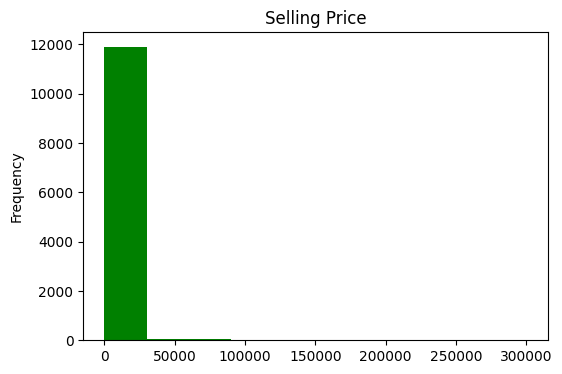

In [25]:
#Creates a histogram for the column selling_price
Prod['selling_price'].plot(kind="hist", figsize=(6,4), color="green")
# Adds a title
plt.title("Selling Price")
# Displays the plot
plt.show()

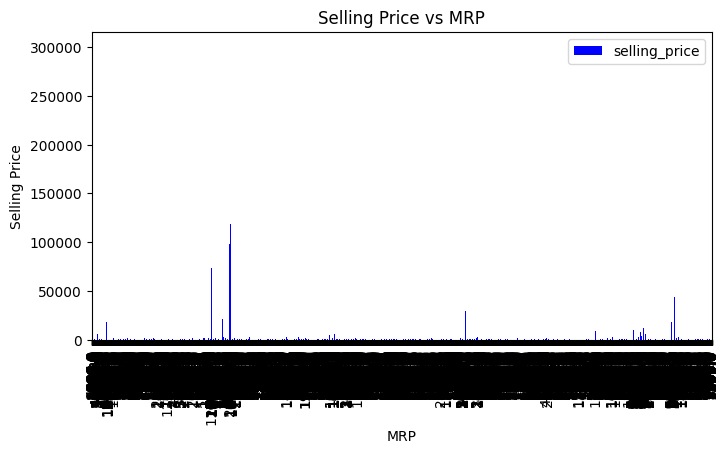

In [26]:
#Create a bar plot of selling_price vs mrp
Prod.plot(kind='bar', x='mrp', y='selling_price', figsize=(8,4), color='blue')
#Add labels and title
plt.xlabel("MRP")
plt.ylabel("Selling Price")
plt.title("Selling Price vs MRP")
#Display the plot
plt.show()

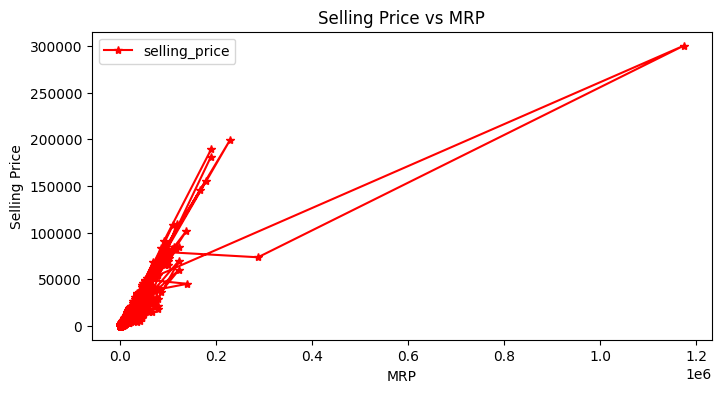

In [27]:
#Create a line plot of selling_price vs product_rating
Prod.plot(kind='line', x='mrp', y='selling_price', figsize=(8,4),marker="*", color='red', markersize=6)
# Add labels and title
plt.xlabel("MRP")
plt.ylabel("Selling Price")
plt.title("Selling Price vs MRP")
# Display the plot
plt.show()

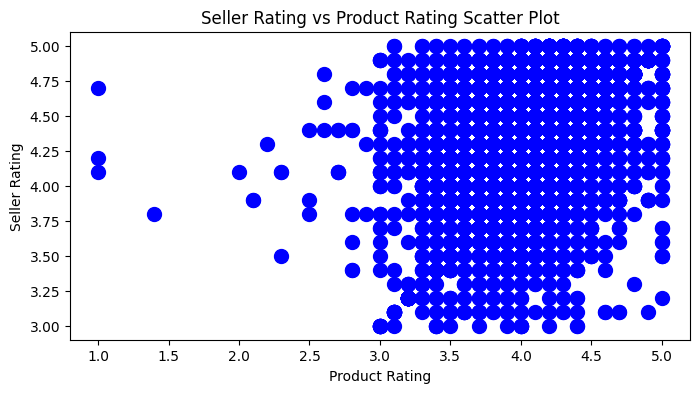

In [28]:
#Create a scatter plot of seller_rating vs product_rating
Prod.plot(kind='scatter', x='product_rating', y='seller_rating', figsize=(8,4), color='blue', s=100)
#Add labels and title
plt.xlabel("Product Rating")
plt.ylabel("Seller Rating")
plt.title("Seller Rating vs Product Rating Scatter Plot")
# Display the plot
plt.show()